# Nicolaus Copernicus University summer internship project 
## Natural Language Processing applied to ancient language texts

We aim to investigate the implementation of a general pipeline to extract qualitative and quantitative information from Latin texts employing ML algorithms. In particular, our approach focuses on detecting similarities between texts of the same author. For instance, it could
be beneficial to classify authors according to writing styles or historical ages, as well as to recognize the author of anonymous documents with a certain probability. \\

Finally, we propose a network representation that aims to capture and represent these similarities, and we quantify the degree of relationship by computing a similarity index.

In [1]:
#Install the necessary libraries
!wget --no-check-certificate --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Te_14UB-DZ8wYPhHGyDg7LadDTjNzpti' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1Te_14UB-DZ8wYPhHGyDg7LadDTjNzpti" -O latin_bert.tar && rm -f /tmp/cookies.txt
!mkdir models
!mv latin_bert.tar models/
!cd models
!tar -xf models/latin_bert.tar
!git clone https://github.com/pietro-sillano/LatinBERT LatinBERT
!pip install cltk==1.0.16
!pip install pygame  beautifulsoup4==4.9.1 cltk nltk==3.6.2 future==0.18.2 numpy tensor2tensor PyYAML==5.4.1 tokenizers==0.8.1rc2 transformers==3.1.0 tqdm==4.48.2 Unidecode==1.1.1 gensim==3.8.3
!pip install --upgrade scikit-learn
!pip install --upgrade spacy
!pip install --upgrade spacy
!pip install umap-learn
!pip install umap-learn[plot]

--2021-08-10 13:47:08--  https://docs.google.com/uc?export=download&confirm=yk&id=1Te_14UB-DZ8wYPhHGyDg7LadDTjNzpti
Resolving docs.google.com (docs.google.com)... 108.177.97.101, 108.177.97.113, 108.177.97.139, ...
Connecting to docs.google.com (docs.google.com)|108.177.97.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘latin_bert.tar’

latin_bert.tar          [ <=>                ]   3.22K  --.-KB/s    in 0s      

2021-08-10 13:47:08 (36.2 MB/s) - ‘latin_bert.tar’ saved [3301]

tar: This does not look like a tar archive
tar: Skipping to next header
tar: Exiting with failure status due to previous errors
Cloning into 'LatinBERT'...
remote: Enumerating objects: 3300, done.
remote: Counting objects: 100% (380/380), done.
remote: Compressing objects: 100% (298/298), done.
remote: Total 3300 (delta 76), reused 379 (delta 75), pack-reused 2920
Receiving objects: 100% (3300/3300), 407.11 MiB | 12.75 MiB/s, done.
Resolving del

In [ ]:
#Import the necessary libraries
import re
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
import sys
import os
import umap
import umap.plot
import numpy as np
import networkx as nx
import pickle
import seaborn as sns
import skimage.measure

In [ ]:
#how much sentences for each author
N=200

In [ ]:
source='/content/LatinBERT/pickle'
auth=[]
vector=[]
sentence=[]
for file in os.listdir(source):
    dbfile = open(source+'/'+file,'rb')     
    db = pickle.load(dbfile)
    for i in range(len(db.keys())):
    #for i in range(N):
        auth.append(str(db[i][0]).replace('corpus2/',''))
        vector.append(db[i][2])
        sentence.append(str(db[i][1]).replace('[CLS]','').replace('[SEP]',''))
X=np.array(vector)
np.shape(X)

(35472, 768)

In [ ]:
y=np.array(auth)

# Cosine similarity

In [ ]:
cos=pd.DataFrame(metrics.pairwise.cosine_similarity(X))
cos

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2160,2161,2162,2163,2164,2165,2166,2167,2168,2169,2170,2171,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181,2182,2183,2184,2185,2186,2187,2188,2189,2190,2191,2192,2193,2194,2195,2196,2197,2198,2199
0,1.000000,0.739235,0.704304,0.806031,0.748622,0.760853,0.770299,0.680070,0.838506,0.809806,0.810138,0.790822,0.805223,0.783003,0.779787,0.786829,0.748384,0.729734,0.816624,0.815112,0.758086,0.815828,0.751188,0.740716,0.756400,0.720301,0.692663,0.734504,0.742728,0.829572,0.660352,0.799931,0.686950,0.759028,0.692214,0.703869,0.764695,0.818008,0.707618,0.736508,...,0.853157,0.775853,0.810209,0.773072,0.761857,0.701000,0.843084,0.716900,0.730428,0.772323,0.802884,0.752868,0.685980,0.822352,0.712627,0.772770,0.721388,0.810565,0.790651,0.770341,0.743820,0.595456,0.691344,0.839177,0.742501,0.743522,0.832097,0.748753,0.685058,0.775547,0.702550,0.789967,0.731523,0.770322,0.725008,0.689176,0.799626,0.827190,0.798333,0.733384
1,0.739235,1.000000,0.773984,0.794135,0.743540,0.816770,0.876355,0.696982,0.779856,0.769595,0.759835,0.764306,0.825507,0.767920,0.812360,0.745586,0.806203,0.676225,0.860271,0.780839,0.673122,0.802153,0.802697,0.793533,0.787153,0.698076,0.722243,0.709774,0.688592,0.785593,0.724089,0.862803,0.633712,0.854098,0.764117,0.740083,0.887058,0.767468,0.829219,0.752659,...,0.789426,0.783548,0.802000,0.792492,0.800824,0.793419,0.830487,0.637780,0.725147,0.826254,0.754325,0.691027,0.806755,0.836047,0.713680,0.823279,0.801708,0.798875,0.755857,0.651820,0.813348,0.611582,0.774311,0.816650,0.704850,0.711240,0.714932,0.830026,0.718142,0.830558,0.656688,0.763232,0.820813,0.757706,0.799990,0.787632,0.786945,0.860721,0.742174,0.789310
2,0.704304,0.773984,1.000000,0.723841,0.676184,0.758923,0.759133,0.754766,0.761577,0.737221,0.661814,0.740392,0.767380,0.720225,0.806268,0.740565,0.714227,0.673713,0.791006,0.717833,0.638829,0.721570,0.712229,0.708210,0.772885,0.674981,0.821247,0.715794,0.693762,0.755246,0.772206,0.776053,0.603190,0.778004,0.747967,0.672515,0.809270,0.699920,0.725807,0.770199,...,0.722726,0.767705,0.774196,0.694568,0.739706,0.743724,0.721112,0.752346,0.627725,0.812024,0.712495,0.706070,0.713029,0.769439,0.665118,0.741117,0.731789,0.748226,0.691852,0.677237,0.725110,0.592213,0.677734,0.769764,0.698965,0.713810,0.685044,0.723270,0.702478,0.758201,0.647308,0.845156,0.761094,0.794886,0.740132,0.790755,0.730545,0.795087,0.714354,0.804010
3,0.806031,0.794135,0.723841,1.000000,0.754081,0.743656,0.789461,0.726295,0.805500,0.777743,0.782246,0.777864,0.803611,0.778967,0.731842,0.754779,0.757098,0.682171,0.789700,0.799475,0.759115,0.829246,0.769709,0.744784,0.809244,0.676862,0.688156,0.730642,0.755923,0.766412,0.696024,0.776673,0.683586,0.806084,0.709958,0.692990,0.792410,0.836184,0.719193,0.718292,...,0.830850,0.735163,0.770938,0.782407,0.788813,0.748616,0.804396,0.706078,0.761270,0.788162,0.816399,0.749036,0.752706,0.795623,0.743991,0.775036,0.766778,0.815665,0.741864,0.757432,0.802223,0.593017,0.719656,0.794550,0.749034,0.719201,0.775659,0.762725,0.672123,0.823054,0.662620,0.779109,0.792671,0.764478,0.762552,0.716878,0.830257,0.844599,0.766732,0.741531
4,0.748622,0.743540,0.676184,0.754081,1.000000,0.682734,0.735540,0.668547,0.738530,0.714200,0.803244,0.784535,0.754739,0.781653,0.727408,0.762262,0.744168,0.633111,0.757339,0.733766,0.684067,0.795852,0.798831,0.731735,0.725682,0.636933,0.636613,0.742343,0.717396,0.758765,0.695311,0.718680,0.658908,0.744753,0.738419,0.758340,0.727492,0.789723,0.740880,0.680993,...,0.755030,0.715825,0.735215,0.819716,0.715641,0.781540,0.746915,0.649494,0.765560,0.755808,0.782955,0.722591,0.715484,0.750231,0.747524,0.804246,0.759497,0.778460,0.754161,0.734783,0.768406,0.615217,0.708520,0.770139,0.700533,0.679715,0.777629,0.767345,0.645716,0.832632,0.619362,0.734017,0.778540,0.702828,0.756267,0.695143,0.808351,0.815716,0.713118,0.692918
...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
pair=[]
for i in range(len(cos)):
  for j in range(len(cos)):
    if i<j:
      if cos[i][j]==1:
         pair.append((i,j))
len(pair)

108

In [ ]:
np.array(cos).min()

0.44789848

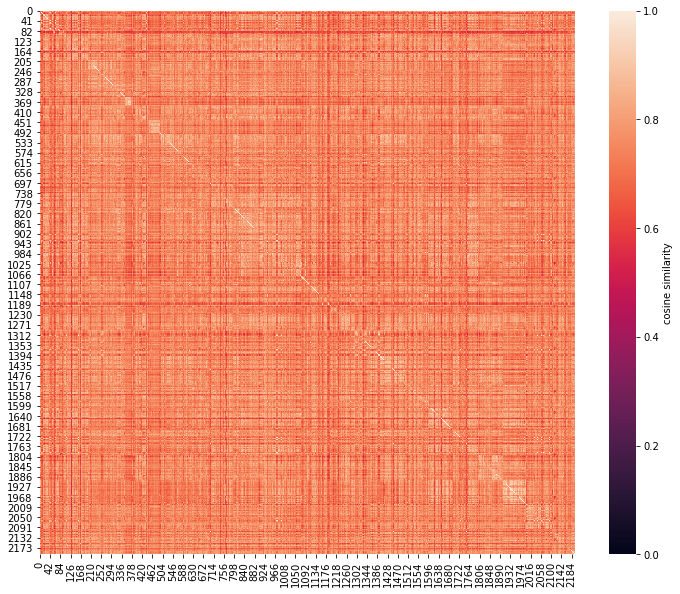

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(cos,vmin=0, vmax=1, cbar_kws={'label': 'cosine similarity'})

In [ ]:
m=len(os.listdir(source))
m_cos=skimage.measure.block_reduce(np.array(cos), (N,N), np.sum)

In [ ]:
indexes = np.unique(y, return_index=True)[1]
auth_un=[y[index] for index in sorted(indexes)]

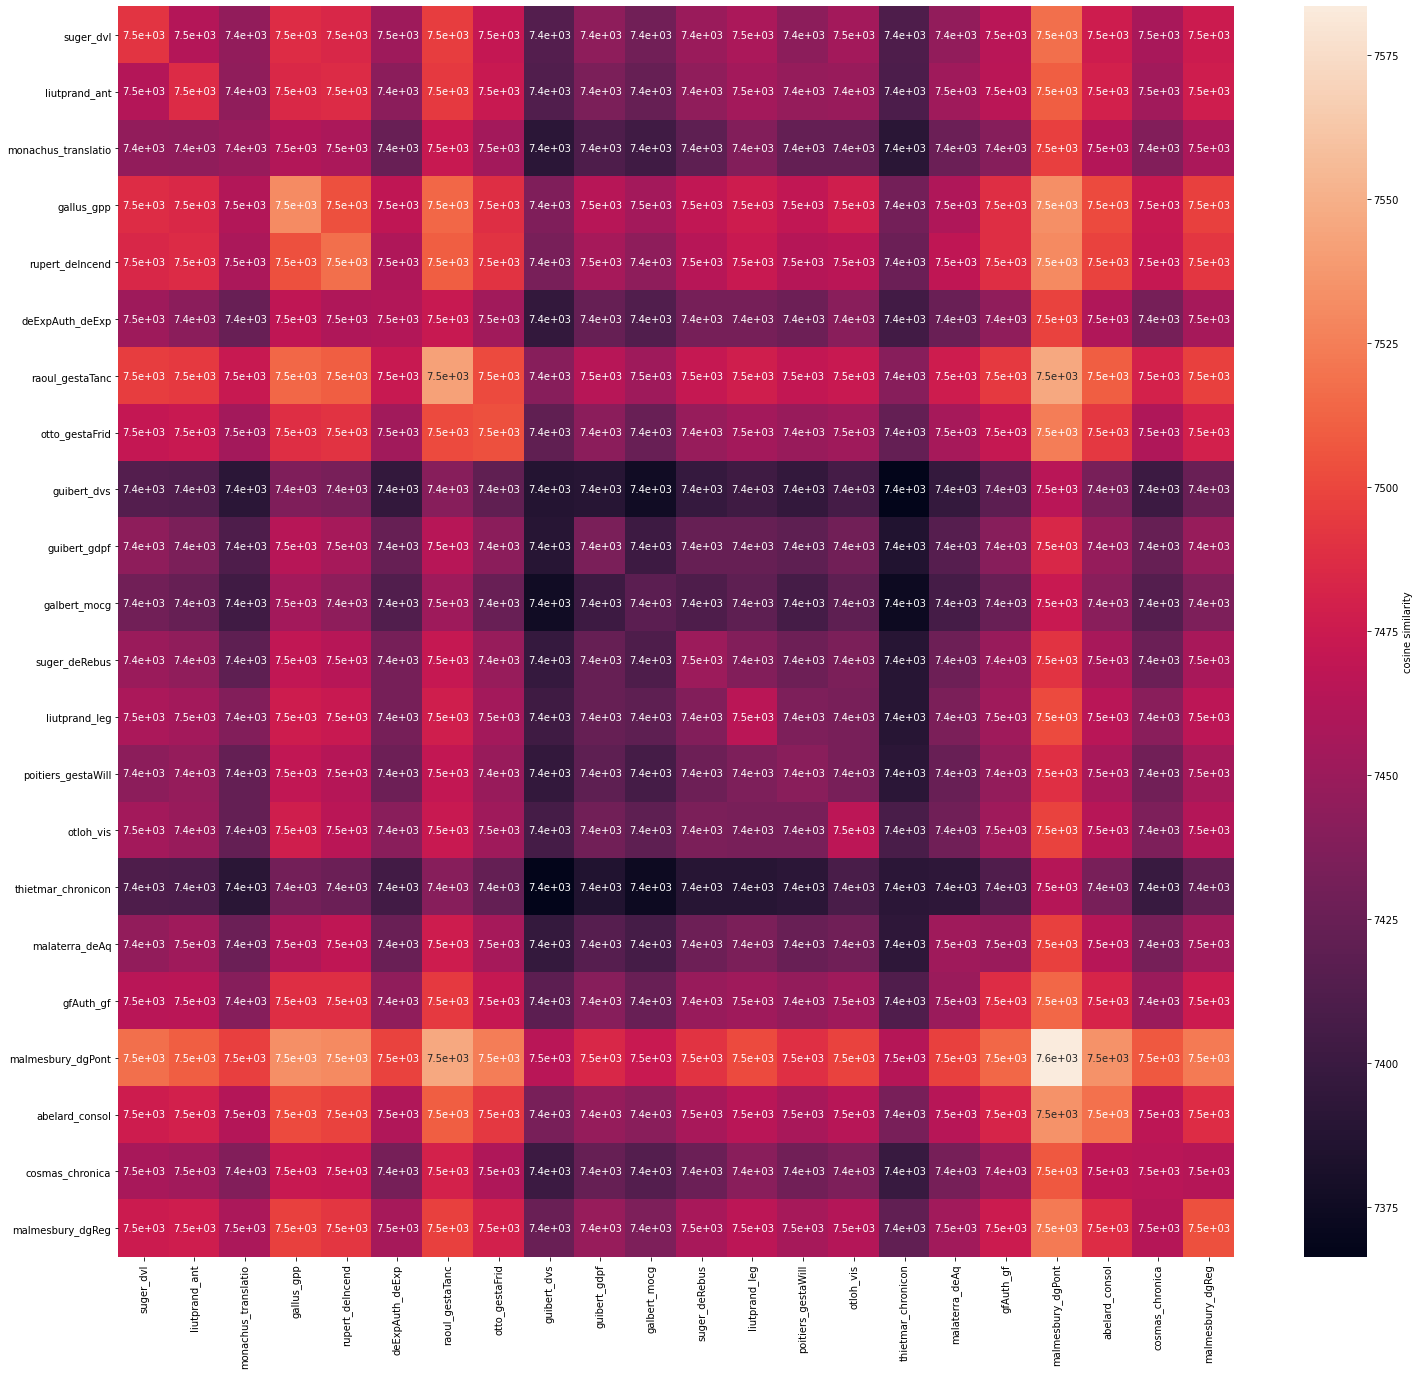

In [ ]:
plt.figure(figsize=(15,13))
ms_cos=MinMaxScaler().fit_transform(m_cos)
sns.heatmap(m_cos,cbar_kws={'label': 'cosine similarity'}, xticklabels=auth_un,yticklabels=auth_un, annot=True)

# Data visualization - UMAP

/usr/local/lib/python3.7/dist-packages/umap/spectral.py:256: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"
/usr/local/lib/python3.7/dist-packages/umap/spectral.py:256: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"
/usr/local/lib/python3.7/dist-packages/umap/spectral.py:256: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: sp

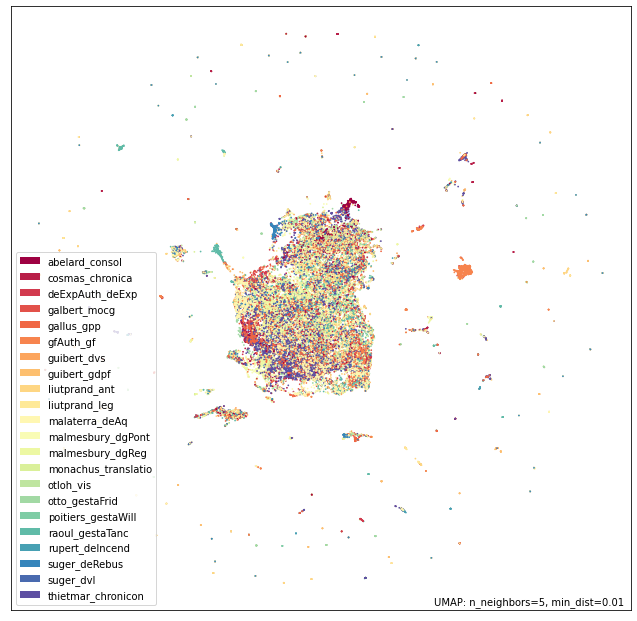

In [ ]:
#dimensionality reduction with UMAP and graphical representation - plot 1
mapper = umap.UMAP(random_state=42, n_components=2, min_dist=0.01, metric='euclidean', n_neighbors=5).fit(X)
umap.plot.points(mapper, labels=y)

/usr/local/lib/python3.7/dist-packages/umap/spectral.py:256: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"
/usr/local/lib/python3.7/dist-packages/umap/spectral.py:256: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"
/usr/local/lib/python3.7/dist-packages/umap/spectral.py:256: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: sp

<Figure size 432x288 with 0 Axes>

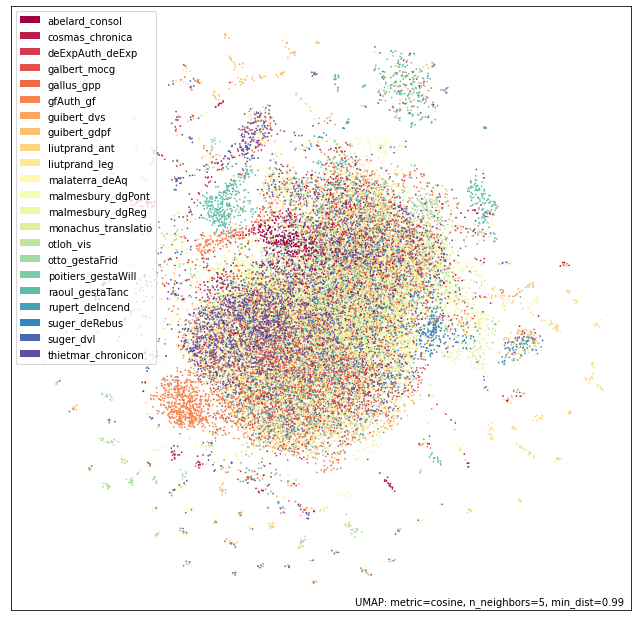

In [ ]:
#dimensionality reduction with UMAP and graphical representation - plot 2, different parameters
mapper = umap.UMAP(random_state=42, n_components=2, metric='cosine',n_neighbors=5, min_dist=0.99).fit(X)
plt.figure()
umap.plot.points(mapper, labels=y)

# Multiclass classification

In [ ]:
#import the machine learning libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import rand_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
d = {'author':y,'vec':vector}
df=pd.DataFrame(d)
df=df.sample(frac=1)
df=df.reset_index()

X=df['vec']
y=np.array(df['author'])

In [ ]:
vv=[]
for i in range(len(df['vec'])):
  vv.append(df['vec'][i])
X=np.array(vv)

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df['author'])


LabelEncoder()

In [ ]:
y=le.transform(df['author'])

### Clustering with K-means

In [ ]:
kmeans_labels = KMeans(random_state=105, n_clusters=len(os.listdir(source)),n_init=100).fit_predict(X) 

In [ ]:
rand_score(kmeans_labels,y) 

0.9110153375501261

### Model selection - supervised

In [ ]:
clf = OneVsRestClassifier(SVC())
scores = cross_val_score(clf, X, y, cv=5)
scores, np.mean(scores)

(array([0.56136364, 0.60454545, 0.58181818, 0.56136364, 0.59318182]),
 0.5804545454545454)

In [ ]:
clf = OneVsRestClassifier(MLPClassifier(random_state=1)) #, activation='relu'
scores = cross_val_score(clf, X, y, cv=5)
scores, np.mean(scores)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


(array([0.64772727, 0.66136364, 0.57954545, 0.61136364, 0.6       ]), 0.62)

In [ ]:
clf = MLPClassifier(random_state=1, max_iter=300) #, activation='relu'
scores = cross_val_score(clf, X, y, cv=5)
scores, np.mean(scores)

(array([0.62272727, 0.62727273, 0.55681818, 0.58409091, 0.60909091]), 0.6)

In [ ]:
clf = KNeighborsClassifier(n_neighbors=20)
scores = cross_val_score(clf, X, y, cv=5)
scores, np.mean(scores)

(array([0.45909091, 0.49090909, 0.48636364, 0.45454545, 0.50909091]), 0.48)

In [ ]:
clf = LogisticRegression(max_iter=500)  
scores = cross_val_score(clf, X, y, cv=5)
scores, np.mean(scores)

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2, radius=0.4)
neigh.fit(X_train)
neigh.kneighbors(X_test, 20, return_distance=False)

array([[1186,  260,  305, ..., 1281,  220,  920],
       [1186,  837, 1683, ..., 1312,  418,  132],
       [1496, 1380,  892, ...,  569, 1418,  953],
       ...,
       [ 309,    2, 1687, ...,  227,  835,  283],
       [1317,   76,  513, ..., 1648,   37,  550],
       [ 645, 1589, 1054, ..., 1529,    2,  116]])

In [ ]:
from sklearn.neighbors import RadiusNeighborsClassifier
clf = RadiusNeighborsClassifier(radius=5)
scores = cross_val_score(clf, X, y, cv=5)
scores, np.mean(scores)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 90, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py", line 504, in predict
    probs = self.predict_proba(X)
  File "/us

(array([nan, nan, nan, nan, nan]), nan)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf=LogisticRegression(max_iter=1000, multi_class='multinomial').fit(X_train,y_train) 

In [ ]:
d = {'output':clf.predict(X_test),'desired':y_test,'correct?':(clf.predict(X_test)==y_test)}
print(clf.score(X_test,y_test))
pd.DataFrame(d)

AttributeError: ignored

### Compute the probability of belonging to a certain class

In [ ]:
y=df['author']

In [ ]:
X_train, X_test, y_train, y_test= [],[],[],[]
for i in range(len(y)):
  if y[i]!='gallus_gpp':
    X_train.append(X[i])
    y_train.append(y[i])
  else:
    X_test.append(X[i])
    y_test.append(y[i])

In [ ]:
len(X_train), len(X_test), len(X)

(2100, 100, 2200)

In [ ]:
L=[]
for i in range(len(nn)):
  l=[]
  for j in range(len(nn[i])):
    l.append(y[nn[i][j]])
  L.append(l)

NameError: ignored

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=10, radius=0.1, metric='cosine')
neigh.fit(X_train)
nn=neigh.kneighbors(X_test, 10, return_distance=False)

In [ ]:
kmeans_labels = KMeans(random_state=105, n_clusters=len(os.listdir(source))-1).fit(X_train) 
nn=kmeans_labels.predict(X_test)

In [ ]:
L=[]
for i in range(len(nn)):
  L.append(un[nn[i]])

#  for j in range(len(nn[i])):
 #   L.append(y[nn[i][j]])


In [ ]:
len(L)

100

In [ ]:
x=CountFrequency(L)

poitiers_gestaWill :  8
gfAuth_gf :  20
guibert_dvs :  8
thietmar_chronicon :  8
suger_dvl :  8
abelard_consol :  5
otloh_vis :  2
suger_deRebus :  9
malaterra_deAq :  13
deExpAuth_deExp :  4
malmesbury_dgReg :  3
rupert_deIncend :  2
liutprand_ant :  1
raoul_gestaTanc :  1
monachus_translatio :  5
galbert_mocg :  2
guibert_gdpf :  1


In [ ]:
def CountFrequency(my_list):
 
    # Creating an empty dictionary
    freq = {}
    for item in my_list:
        if (item in freq):
            freq[item] += 1
        else:
            freq[item] = 1
 
    for key, value in freq.items():
        print ("% s : % d"%(key, value))

In [ ]:
s=0
for i in range(len(L)):
  if 'monachus_translatio' in L[i]:
    s=s+1
s

80

In [ ]:
s=0
for i in range(len(L)):
  if 'abelard_consol' in L[i]:
    s=s+1
s

77

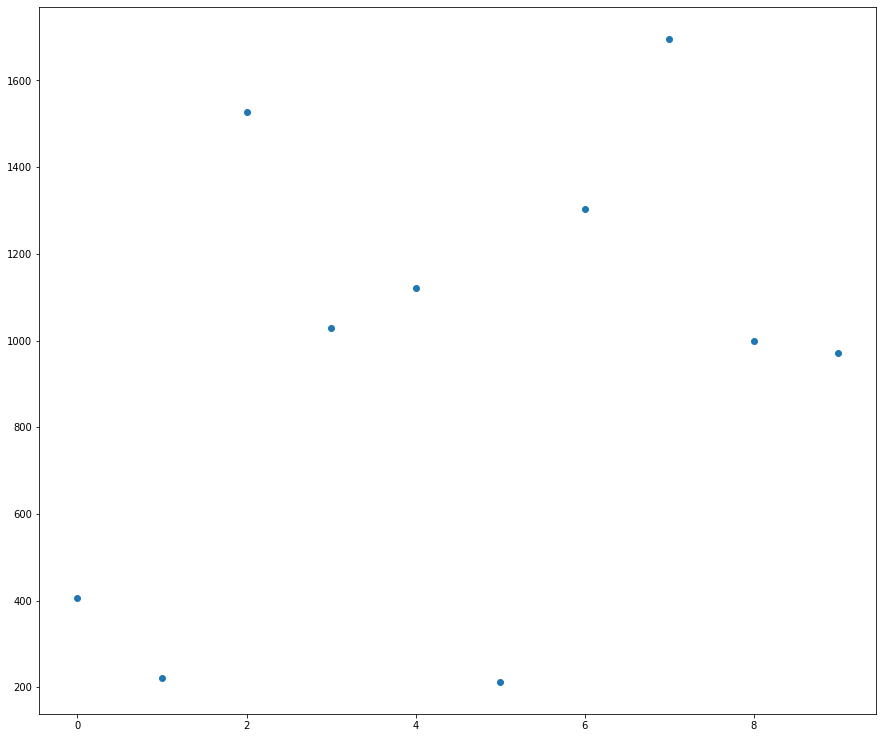

In [ ]:
plt.figure(figsize=(15,13))
plt.plot(nn[0],'o')

In [ ]:
pref=LogisticRegression(max_iter=500,solver='sag').fit(X_train, y_train)

In [ ]:
prob=pref.predict_proba(X_test)

In [ ]:
indexes = np.unique(y, return_index=True)[1]
un=[y[index] for index in sorted(indexes)]

In [ ]:
un.remove('gallus_gpp')

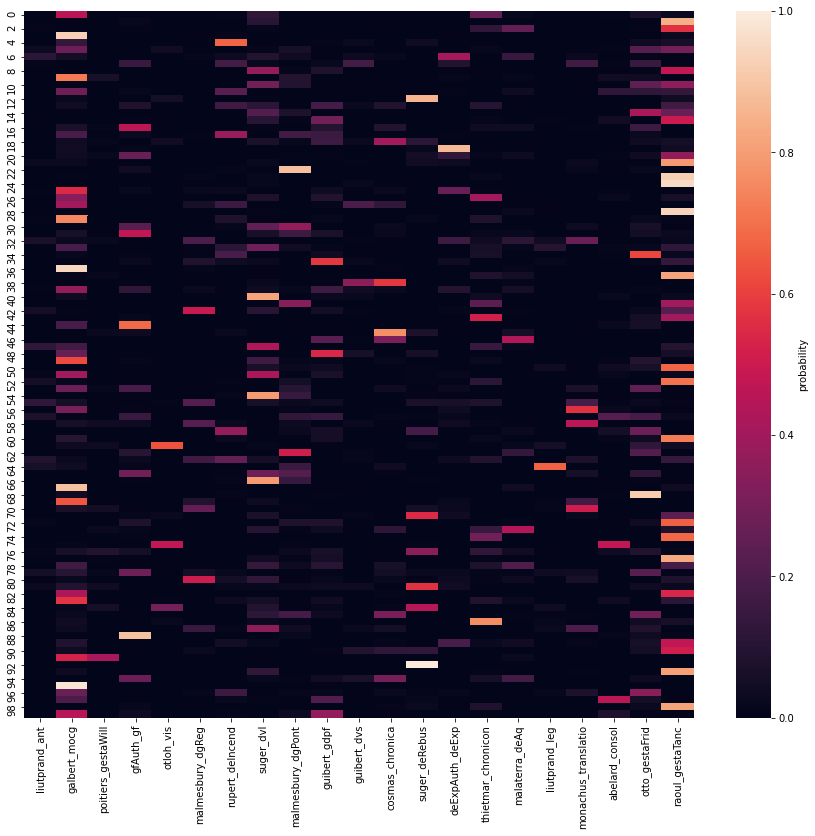

In [ ]:
plt.figure(figsize=(15,13))
sns.heatmap(prob,vmin=0, vmax=1 ,cbar_kws={'label': 'probability'}, xticklabels=un)

In [ ]:
d = {'author':list(un),'mean probability':prob.mean(axis=0)}
pd.DataFrame(d).sort_values(by=['mean probability'],ascending=False).reset_index()

,index,author,mean probability
0,20,raoul_gestaTanc,0.188962
1,1,galbert_mocg,0.155176
2,7,suger_dvl,0.078679
3,19,otto_gestaFrid,0.064255
4,3,gfAuth_gf,0.053939
5,12,suger_deRebus,0.048543
6,8,malmesbury_dgPont,0.046272
7,9,guibert_gdpf,0.045740
8,14,thietmar_chronicon,0.044158
9,11,cosmas_chronica,0.038652


# Network of authors

In [ ]:
indexes = np.unique(y, return_index=True)[1]
auth_un=[y[index] for index in sorted(indexes)]

In [ ]:
#we consider the k_means centers
kmeans = KMeans(n_clusters=len(auth_un), random_state=105).fit(X)
cen=kmeans.cluster_centers_
np.shape(cen)


(22, 768)

In [ ]:
cos=pd.DataFrame(metrics.pairwise.cosine_similarity(cen))

In [ ]:
np.shape(np.mean(X[0+2*100:100+2*100],axis=0))

(768,)

In [ ]:
vm=[]
for k in range(len(auth_un)):
  vm.append(np.mean(X[0+k*N:N+k*N],axis=0))

In [ ]:
np.shape(vm)

(22, 768)

In [ ]:
cen=vm

In [ ]:
cos=pd.DataFrame(metrics.pairwise.cosine_similarity(cen))

In [ ]:
N=len(cen)
N

22

In [ ]:
from scipy.spatial import distance
cos=np.ones((N,N))
for i in range(N):
  for j in range(N):
    cos[i,j]=1-distance.braycurtis(cen[i],cen[j])

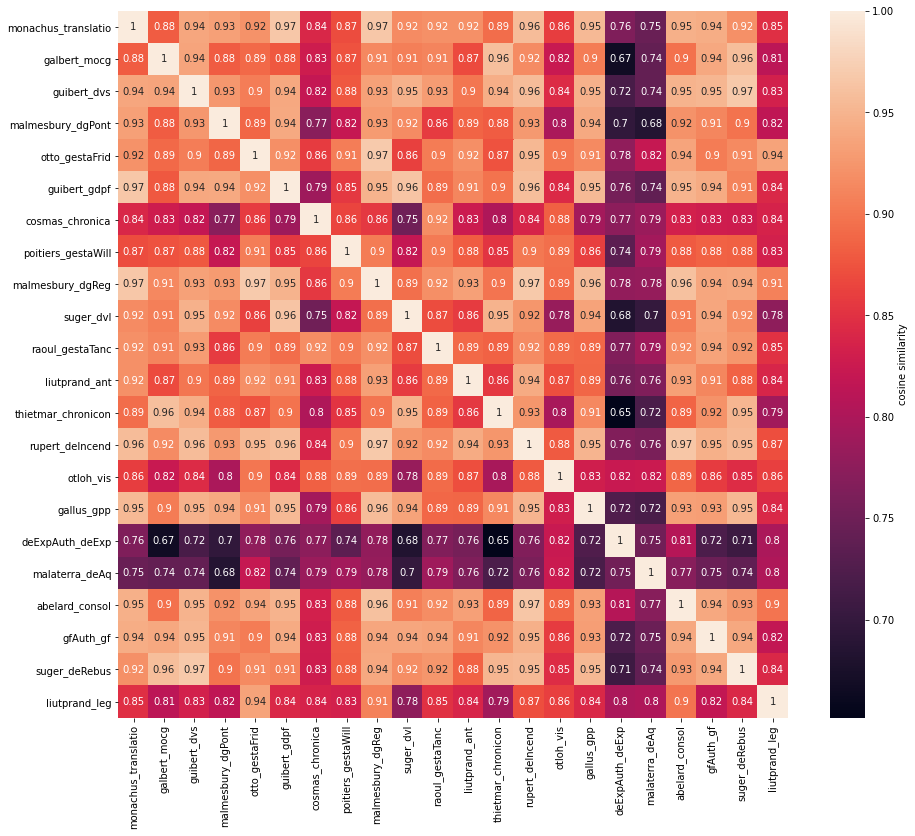

In [ ]:
plt.figure(figsize=(15,13))
sns.heatmap(cos,cbar_kws={'label': 'cosine similarity'}, xticklabels=auth_un,yticklabels=auth_un, annot=True)

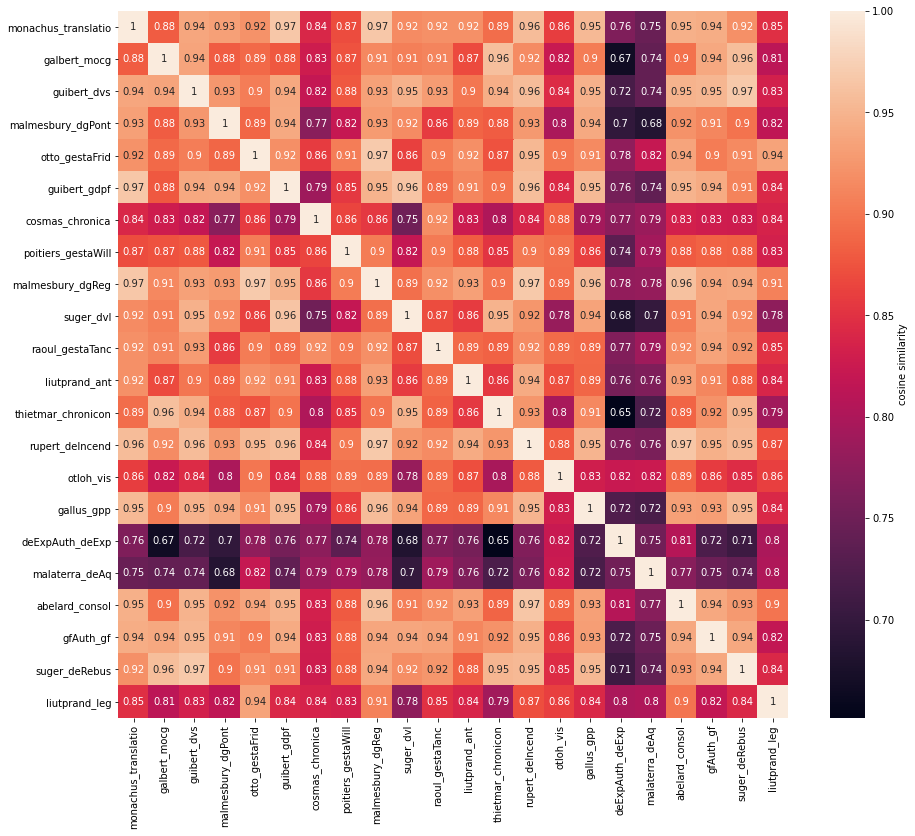

In [ ]:
plt.figure(figsize=(15,13))
sns.heatmap(cos,cbar_kws={'label': 'cosine similarity'}, xticklabels=auth_un,yticklabels=auth_un, annot=True)

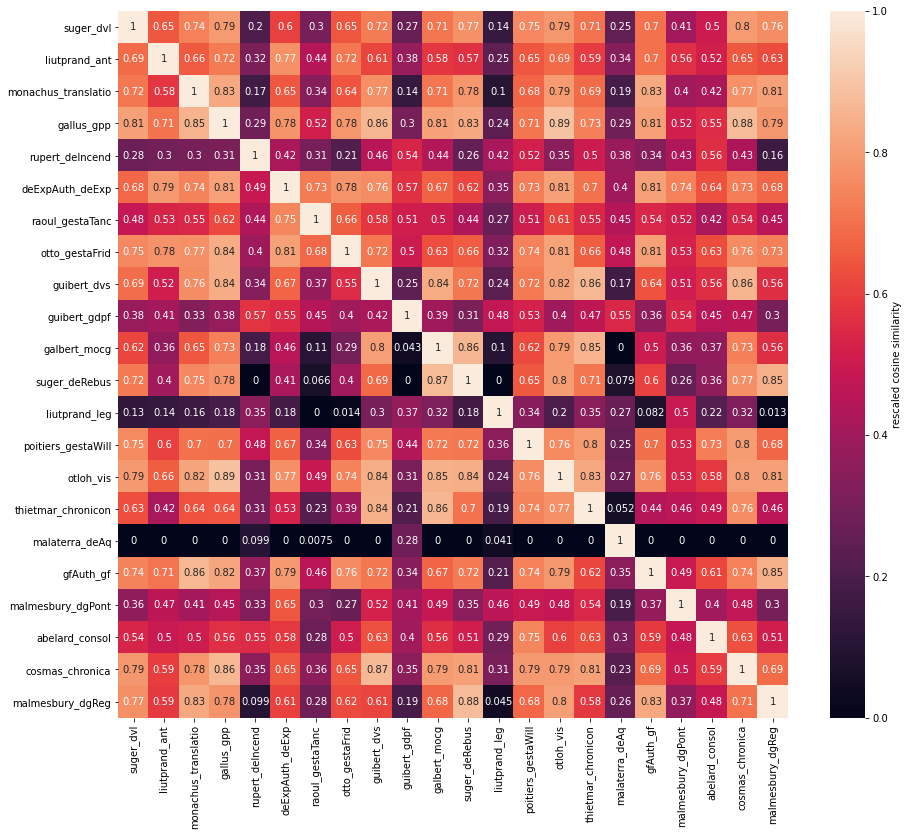

In [ ]:
#rescale
cos=MinMaxScaler().fit_transform(cos)
plt.figure(figsize=(15,13))
sns.heatmap(cos,vmin=0, vmax=1 ,cbar_kws={'label': 'rescaled cosine similarity'}, xticklabels=auth_un,yticklabels=auth_un, annot=True)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


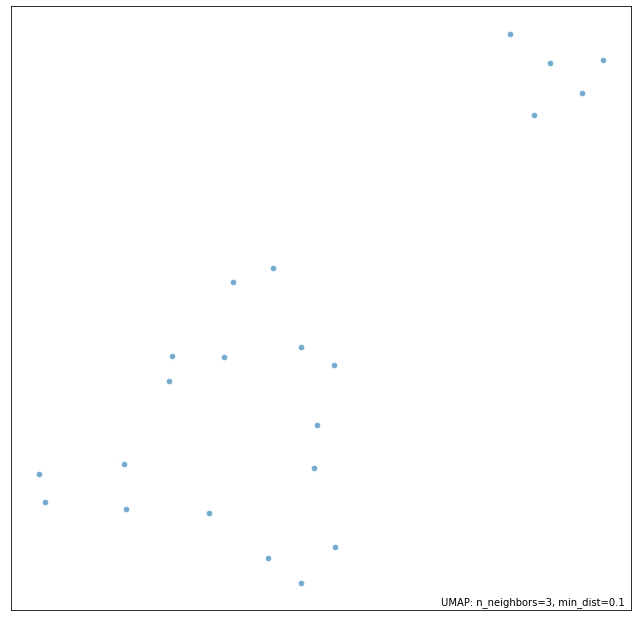

In [ ]:
#dimensionality reduction with UMAP and graphical representation - plot 1
mapper = umap.UMAP(random_state=42, n_components=2, min_dist=0.1, metric='euclidean', n_neighbors=3).fit(cen)
#position - the same as umap
p=mapper.transform(cen)
#plot
umap.plot.points(mapper)

In [ ]:
li=[]
col=[]

N=np.shape(cos)[0]

for i in range(N):
    for j in range(N):
      if cos[i][j]!=0:
        li.append([i,j,cos[i][j]])

for i in range(len(li)):
    col.append(li[i][2])

G1 = nx.DiGraph() 
G1.add_weighted_edges_from(li)

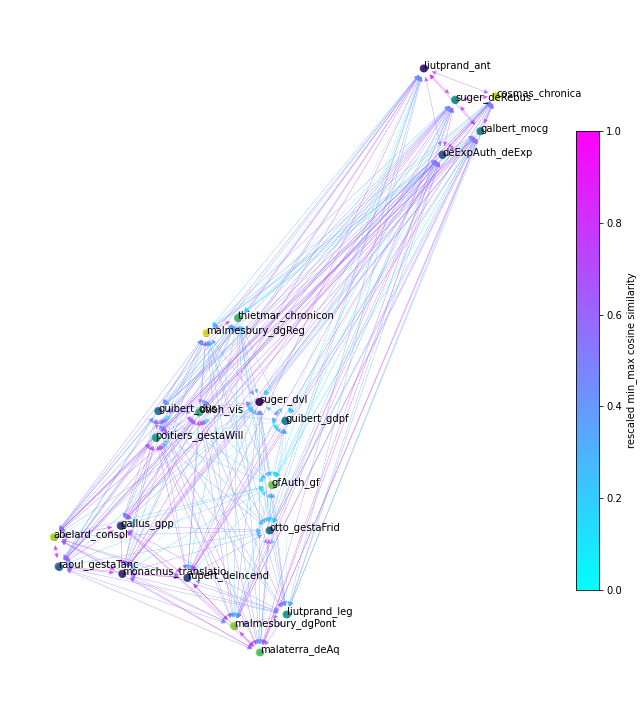

In [ ]:
#Plotting network with colormap based on cosine similarity
plt.figure(figsize=(12, 13))

vmin = np.min(np.array(cos))
vmax = np.max(np.array(cos))

edge=nx.draw_networkx_edges(G1, p, alpha=0.8, edge_color=col, width=0.2,  edge_vmin=vmin, edge_vmax=vmax, edge_cmap=plt.cm.cool) 

nx.draw_networkx_nodes(G1, p, node_size=50.0, node_color=range(np.shape(cos)[0]), alpha=0.8)  


sm = plt.cm.ScalarMappable(cmap=plt.cm.cool) #, norm=plt.Normalize(vmin=vmin, vmax=vmax)
sm.set_array([])
cbar = plt.colorbar(sm,shrink=0.65, label="rescaled min_max cosine similarity")

plt.scatter(p[:,0], p[:,1])
n=auth_un
for i, txt in enumerate(n):
    plt.annotate(txt, (p[i,0], p[i,1]))

plt.axis('off')
plt.show()

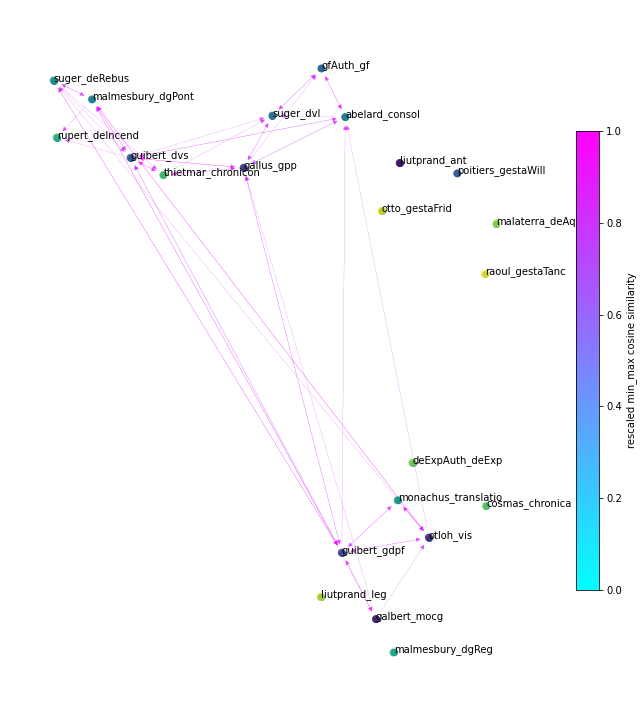

In [ ]:
cos[cos < .8] = 0
li=[]
col=[]

N=np.shape(cos)[0]

for i in range(N):
    for j in range(N):
      if cos[i][j]!=0:
        li.append([i,j,cos[i][j]])

for i in range(len(li)):
    col.append(li[i][2])

G1 = nx.DiGraph() 
G1.add_weighted_edges_from(li)

#Plotting network with colormap based on cosine similarity
plt.figure(figsize=(12, 13))

vmin = np.min(np.array(cos))
vmax = np.max(np.array(cos))

edge=nx.draw_networkx_edges(G1, p, alpha=0.8, edge_color=col, width=0.2,  edge_vmin=vmin, edge_vmax=vmax, edge_cmap=plt.cm.cool) 

nx.draw_networkx_nodes(G1, p, node_size=50.0, node_color=range(np.shape(cos)[0]), alpha=0.8)  


sm = plt.cm.ScalarMappable(cmap=plt.cm.cool) #, norm=plt.Normalize(vmin=vmin, vmax=vmax)
sm.set_array([])
cbar = plt.colorbar(sm,shrink=0.65, label="rescaled min_max cosine similarity")

plt.scatter(p[:,0], p[:,1])
n=auth_un
for i, txt in enumerate(n):
    plt.annotate(txt, (p[i,0], p[i,1]))

plt.axis('off')
plt.show()